In [1]:
from pypsdm.models.input.container.participants import SystemParticipantsContainer
from pypsdm.models.result.container.participants import ParticipantsResultContainer
from pypsdm.models import gwr
from pypsdm.analysis.concurrency import (calc_glg, curve_regression, do_all_glg_plots, get_installed_capacity)
from datetime import datetime
from pypsdm.processing.series import quarter_hourly_mean_resample
import pandas as pd
import os

# Get the folder path where the files are located
folder_inputs = r'C:\tmp\20231121_flex_testminigrid_2023-11-21_08-37-58\input\grid'
folder_res = r'C:\tmp\20231121_flex_testminigrid_2023-11-21_08-37-58\rawOutputData'
# endtime = datetime(2020,1,1)
endtime = datetime(2019, 12, 31)

folder_glz_cases = r'C:\tmp\20231121_flex_testminigrid_2023-11-21_08-37-58\input\GLZ'
file_name_glz_cases = 'em_to_case_dict.csv'
em_cases_dict = pd.read_csv(os.path.join(folder_glz_cases, file_name_glz_cases), index_col=0).rename_axis(index='em_uuid')


gwr = gwr.GridWithResults.from_csv('flex_minigrid', folder_inputs,',',folder_res,',', simulation_end=endtime)


In [2]:
from pypsdm.analysis.concurrency import (get_installed_capacity)
df_input = em_cases_dict.index.tolist()
em_installed_capacity_res_2 = get_installed_capacity(df_input,gwr)


In [3]:


# Parameter, die einzustellen sind:
#num_vehicles = 100
# len_curve = 150  # Ziel: 150, gibt die maximale Anzahl an EV innerhalb der GZ-Kurve an
len_curve = 25  # Ziel: 150, gibt die maximale Anzahl an EV innerhalb der GZ-Kurve an
num_mc = 150  # Ziel: 1000, Anzahl an Monte-Carlo-Iterationen pro Punkt in der GZ-Kurve

"""
 Initialisierung
"""


# Initialisierung
#temp_profile = pd.DataFrame(np.zeros(shape=(0, num_vehicles)))
#temp_sim = pd.DataFrame(np.zeros(shape=(num_mc, 1)))

# Einlesen der Daten:

df_resample = quarter_hourly_mean_resample(gwr.results.participants.loads.p)
# df_resample = df_resample.filter(em_installed_capacity_res.index)
# df_norm = normalize_dataframe_by_installed_capacity(df_resample, em_installed_capacity_res)
# df_norm = normalize_dataframe_min_max(df_resample)
df = df_resample

sim_curve, quantile_95, quantile_95_tot, quantile_95_indices = calc_glg(df,em_installed_capacity_res_2, len_curve, num_mc)


Calculate GZ for ev-number 1
Calculate GZ for ev-number 2
Calculate GZ for ev-number 3
Calculate GZ for ev-number 4
Calculate GZ for ev-number 5
Calculate GZ for ev-number 6
Calculate GZ for ev-number 7
Calculate GZ for ev-number 8
Calculate GZ for ev-number 9
Calculate GZ for ev-number 10
Calculate GZ for ev-number 11
Calculate GZ for ev-number 12
Calculate GZ for ev-number 13
Calculate GZ for ev-number 14
Calculate GZ for ev-number 15
Calculate GZ for ev-number 16
Calculate GZ for ev-number 17
Calculate GZ for ev-number 18
Calculate GZ for ev-number 19
Calculate GZ for ev-number 20
Calculate GZ for ev-number 21
Calculate GZ for ev-number 22
Calculate GZ for ev-number 23
Calculate GZ for ev-number 24
Calculate GZ for ev-number 25


In [8]:
x,y = curve_regression(quantile_95_indices,quantile_95, quantile_95_tot)

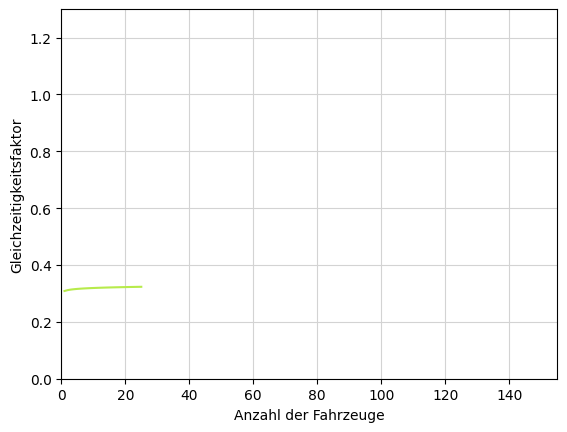

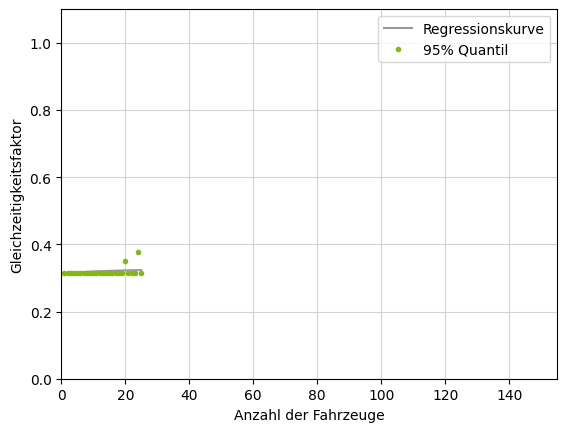

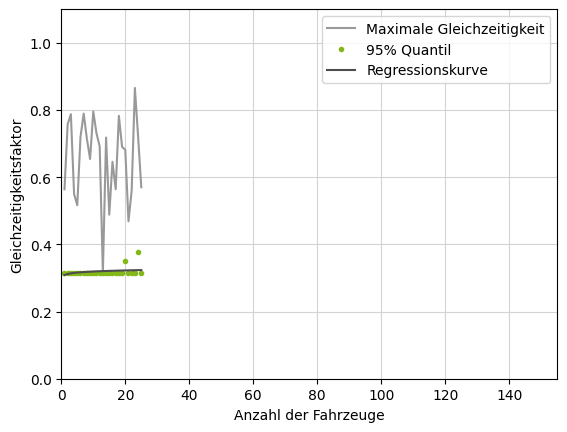

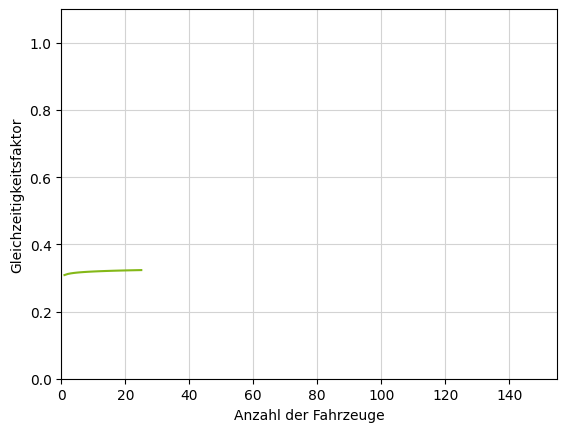

In [11]:
do_all_glg_plots(x,y,sim_curve,quantile_95_tot)